In [36]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## I. Analyse descriptive

### I.1. Structure des données

In [37]:
# Chemin du fichier HDF5
file_path = "data_sample/TimeSeries_Scenario_00013_ScenarioInstanceRandint_id_0013.h5"

# Ouvrir le fichier HDF5 en mode lecture
with h5py.File(file_path, 'r') as hdf:
    # Lister les groupes de données dans le fichier
    for group in hdf.keys():
        print(f"Groupe : {group}")
        
        # Parcourir les datasets (jeux de données) dans chaque groupe
        for dataset in hdf[group].keys():
            data = hdf[group][dataset]
            print(f"  Dataset : {dataset}")
            print(f"    - Shape : {data.shape}")
            print(f"    - Type : {data.dtype}")
            #print(hdf[group][dataset][:])

Groupe : data
  Dataset : axis0
    - Shape : (4980,)
    - Type : |S64
  Dataset : axis1
    - Shape : (3583,)
    - Type : int64
  Dataset : block0_items
    - Shape : (3229,)
    - Type : |S64
  Dataset : block0_values
    - Shape : (3583, 3229)
    - Type : float32
  Dataset : block1_items
    - Shape : (9,)
    - Type : |S52
  Dataset : block1_values
    - Shape : (3583, 9)
    - Type : float64
  Dataset : block2_items
    - Shape : (718,)
    - Type : |S55
  Dataset : block2_values
    - Shape : (3583, 718)
    - Type : int32
  Dataset : block3_items
    - Shape : (1024,)
    - Type : |S38
  Dataset : block3_values
    - Shape : (3583, 1024)
    - Type : int8



Nous pouvons voir que les données comprennent 4980 variables, dont les noms sont stockés dans le dataset axis0, et 3583 points temporels (dont les noms sont stockés dans le dataset axis1). De plus, les données sont divisées en 4 blocs de données différents, avec les noms des variables dans chaque bloc stockés dans le dataset _items et les valeurs dans le dataset _values. Le bloc0 contient 3229 variables, le bloc1 en contient 9, le bloc2 en contient 718 et le bloc3 en contient 1024. Enfin, nos variables sont des variables quantitatives.

In [40]:
with open("block0_items.txt", "w") as file:
    for item in block0_items:
        file.write(f"{item}\n")

In [54]:
# Ouvrir le fichier HDF5 en mode lecture
with h5py.File(file_path, 'r') as hdf:
    # Accéder directement aux datasets en utilisant le chemin complet
    axis0 = hdf['data/axis0'][:]
    axis1 = hdf['data/axis1'][:]
    block0_items = hdf['data/block0_items'][:]
    block0_values = pd.DataFrame(hdf['data/block0_values'][:], columns=block0_items)
    block1_items = hdf['data/block1_items'][:]
    block1_values = pd.DataFrame(hdf['data/block1_values'][:], columns=block1_items)
    block2_items = hdf['data/block2_items'][:]
    block2_values = pd.DataFrame(hdf['data/block2_values'][:], columns=block2_items)
    block3_items = hdf['data/block3_items'][:]
    block3_values = pd.DataFrame(hdf['data/block3_values'][:], columns=block3_items)

### I.2. Valeurs manquantes

In [64]:
missing_values_count_0 = block0_values.isnull().sum().sum()
print(missing_values_count_0)
missing_values_count_1 = block1_values.isnull().sum().sum()
print(missing_values_count_1)
missing_values_count_2 = block2_values.isnull().sum().sum()
print(missing_values_count_2)
missing_values_count_3 = block3_values.isnull().sum().sum()
print(missing_values_count_3)

0
0
0
0


### I.3. Analyse univariée

#### Distributions

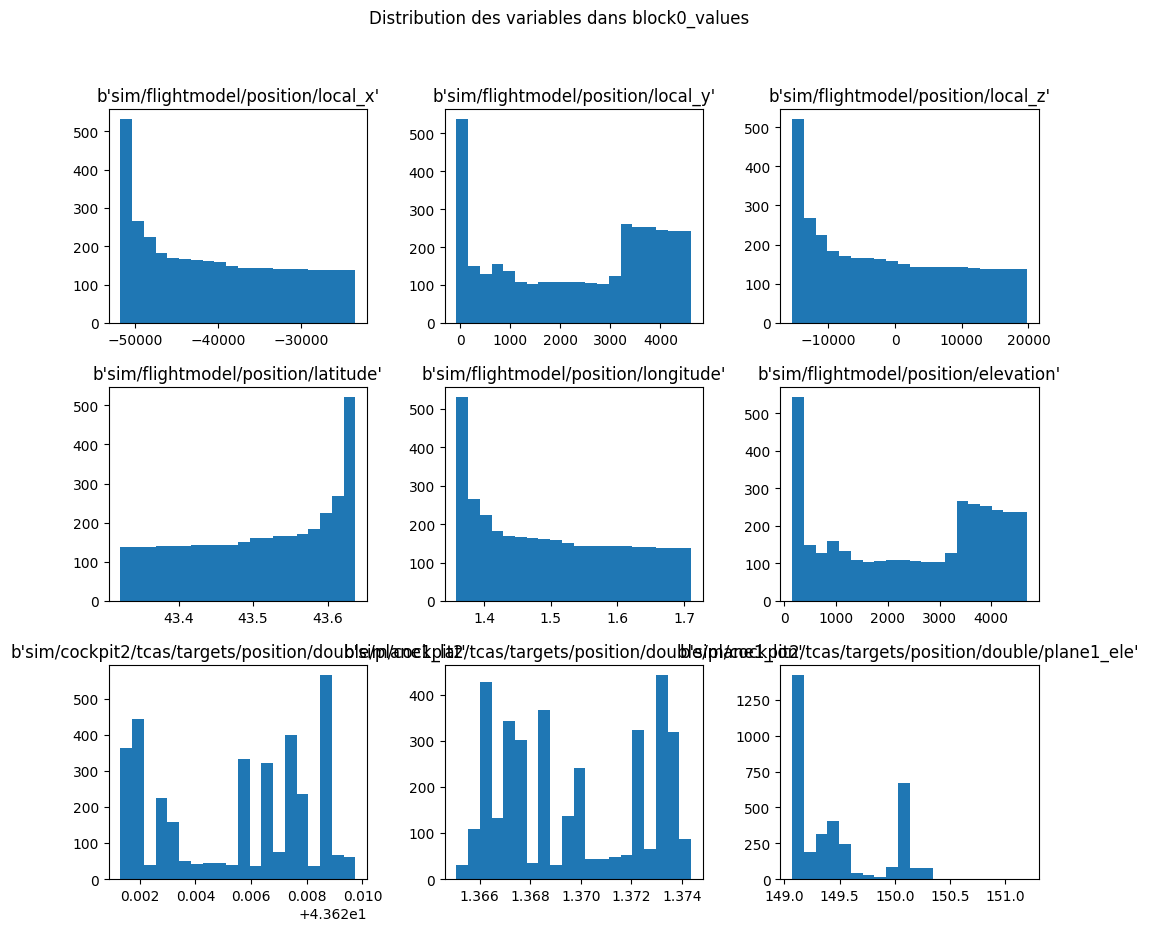

In [ ]:
# Histogrammes pour les premières colonnes
block1_values.hist(bins=20, figsize=(12, 10), grid=False)
plt.suptitle("Distribution des variables dans block0_values")
plt.show()

#### Évolution temporelle des variables

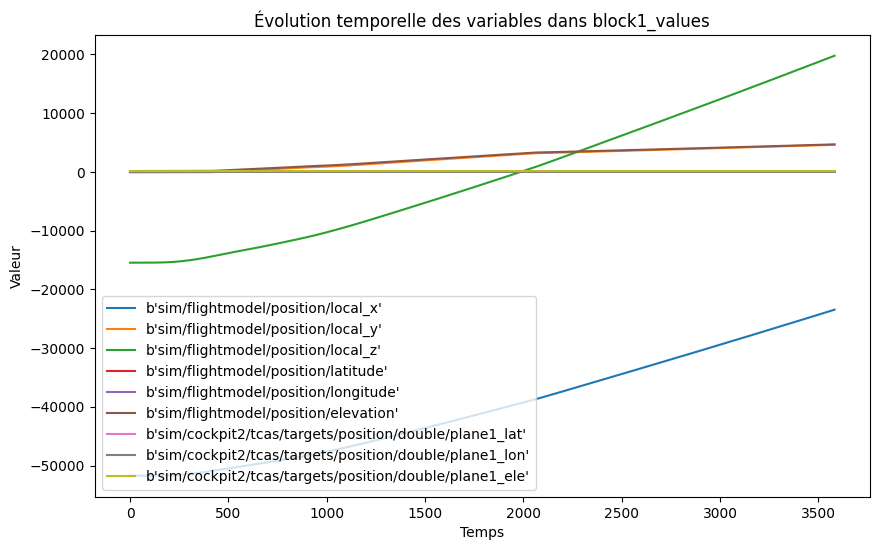

In [55]:
# Visualiser block1_values au cours du temps
plt.figure(figsize=(10, 6))
for col in block1_values.columns[:]:  # Sélectionner quelques colonnes à visualiser
    plt.plot(block1_values[col], label=col)

plt.title("Évolution temporelle des variables dans block1_values")
plt.xlabel("Temps")
plt.ylabel("Valeur")
plt.legend()
plt.show()


###  I.4. Analyse bivariée

#### Corrélation

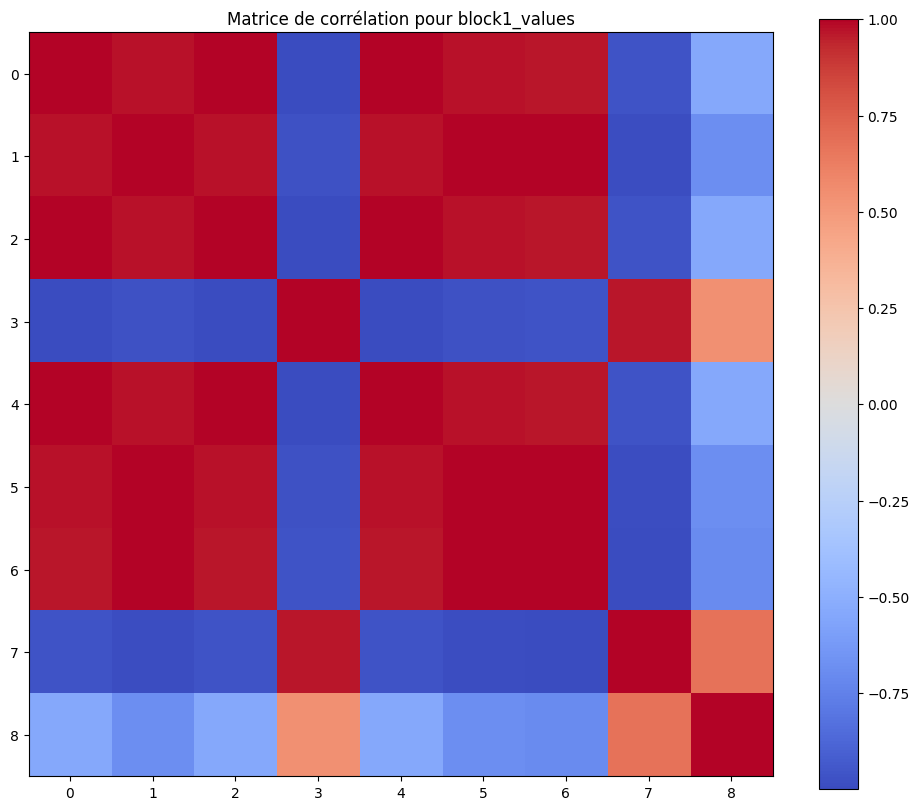

In [48]:
corr_matrix = block1_values.corr()
plt.figure(figsize=(12, 10))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title("Matrice de corrélation pour block1_values")
plt.show()